**Sync Intern's**

Name: KANAKAM VISHAL

Task 2: Real-time Face Mask Detection

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/drive/MyDrive/Sync/datasheet"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '/content/drive/MyDrive/Sync/datasheet'.
there are 0 directories and 49 images in '/content/drive/MyDrive/Sync/datasheet/with_musk'.
there are 0 directories and 49 images in '/content/drive/MyDrive/Sync/datasheet/without_musk'.


In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

In [ ]:
data=[]
labels=[]
no_mask=os.listdir("/content/drive/MyDrive/Sync/datasheet/without_musk/")
for a in no_mask:

    image = cv2.imread("/content/drive/MyDrive/Sync/datasheet/without_musk/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/drive/MyDrive/Sync/test/without_mask/")
for a in no_mask:

    image = cv2.imread("/content/drive/MyDrive/Sync/test/without_mask/"+a,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(0)

In [ ]:
mask=os.listdir("/content/drive/MyDrive/Sync/datasheet/with_musk/")
for a in mask:

    image = cv2.imread("/content/drive/MyDrive/Sync/datasheet/with_musk/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/drive/MyDrive/Sync/test/with_mask/")
for a in mask:

    image = cv2.imread("/content/drive/MyDrive/Sync/test/with_mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape    

(196, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=15,validation_split= 0.1, batch_size=32)

Epoch 1/15
5/5 [==============================] - 21s 3s/step - loss: 2.9689 - accuracy: 0.5253 - val_loss: 0.0548 - val_accuracy: 1.0000
Epoch 2/15
5/5 [==============================] - 9s 2s/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 10s 2s/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 10s 2s/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 9s 2s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 8/15
5/5 [======================

In [ ]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

1/1 [==============================] - 1s 1s/step


In [ ]:

pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

No Mask  Mask
No Mask       10     0
Mask           0    10

In [ ]:
model_name = "/content/drive/MyDrive/Sync/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

%config Completer.use_jedi = False

In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
mask_detection = tf.keras.models.load_model("/content/drive/MyDrive/Sync/mask_detection_best.h5")

In [ ]:
text_mask = "Mask On"
text_no_mask = "Mask Off"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [ ]:
def predict(image):
    
    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)
    
    return prediction[0][0]

In [ ]:
def detector(gray_image, frame):
    
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)
    
    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)

        
        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)
        
        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)
            
    return frame

In [ ]:
import cv2

# Create a face detector object
detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open the video capture
video_cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video capture
    ret, frame = video_cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = detector.detectMultiScale(gray_frame)

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame with detected faces
    cv2.imshow("Face Detection", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture and close all windows
video_cap.release()
cv2.destroyAllWindows()


In [ ]:
video_cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = video_cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detect = detector(gray_frame, frame)
    
    cv2.imshow("Mask Detection", detect)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
video_cap.release()
cv2.destroyAllWindows()

In [ ]:
# importing the necessary libraries
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# Define image paths
with_mask=(r"/content/drive/MyDrive/Sync/train/with_mask")
without_mask=(r"/content/drive/MyDrive/Sync/train/without_mask")
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask        658
without_mask     657

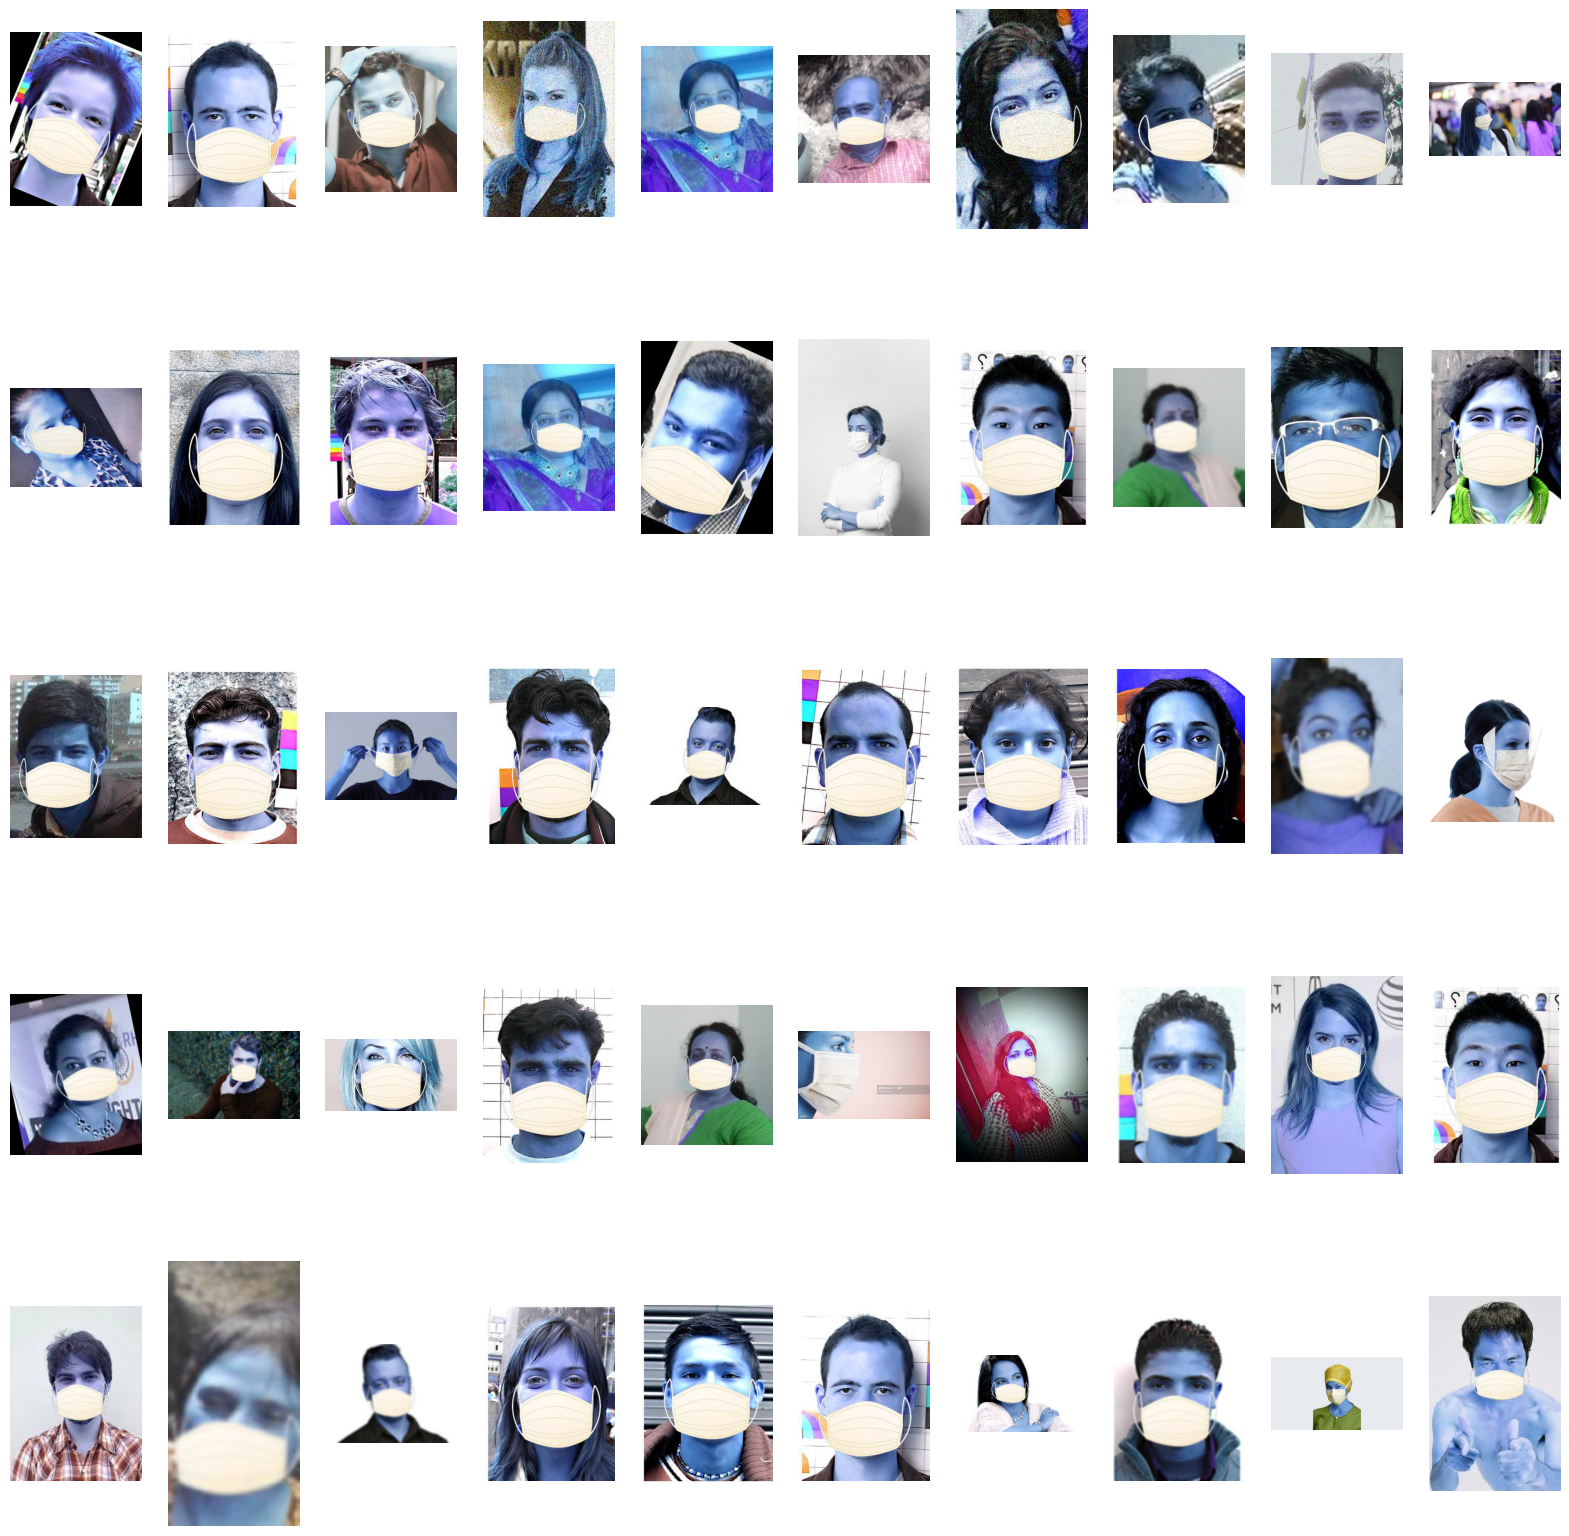

In [ ]:
#Show With Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

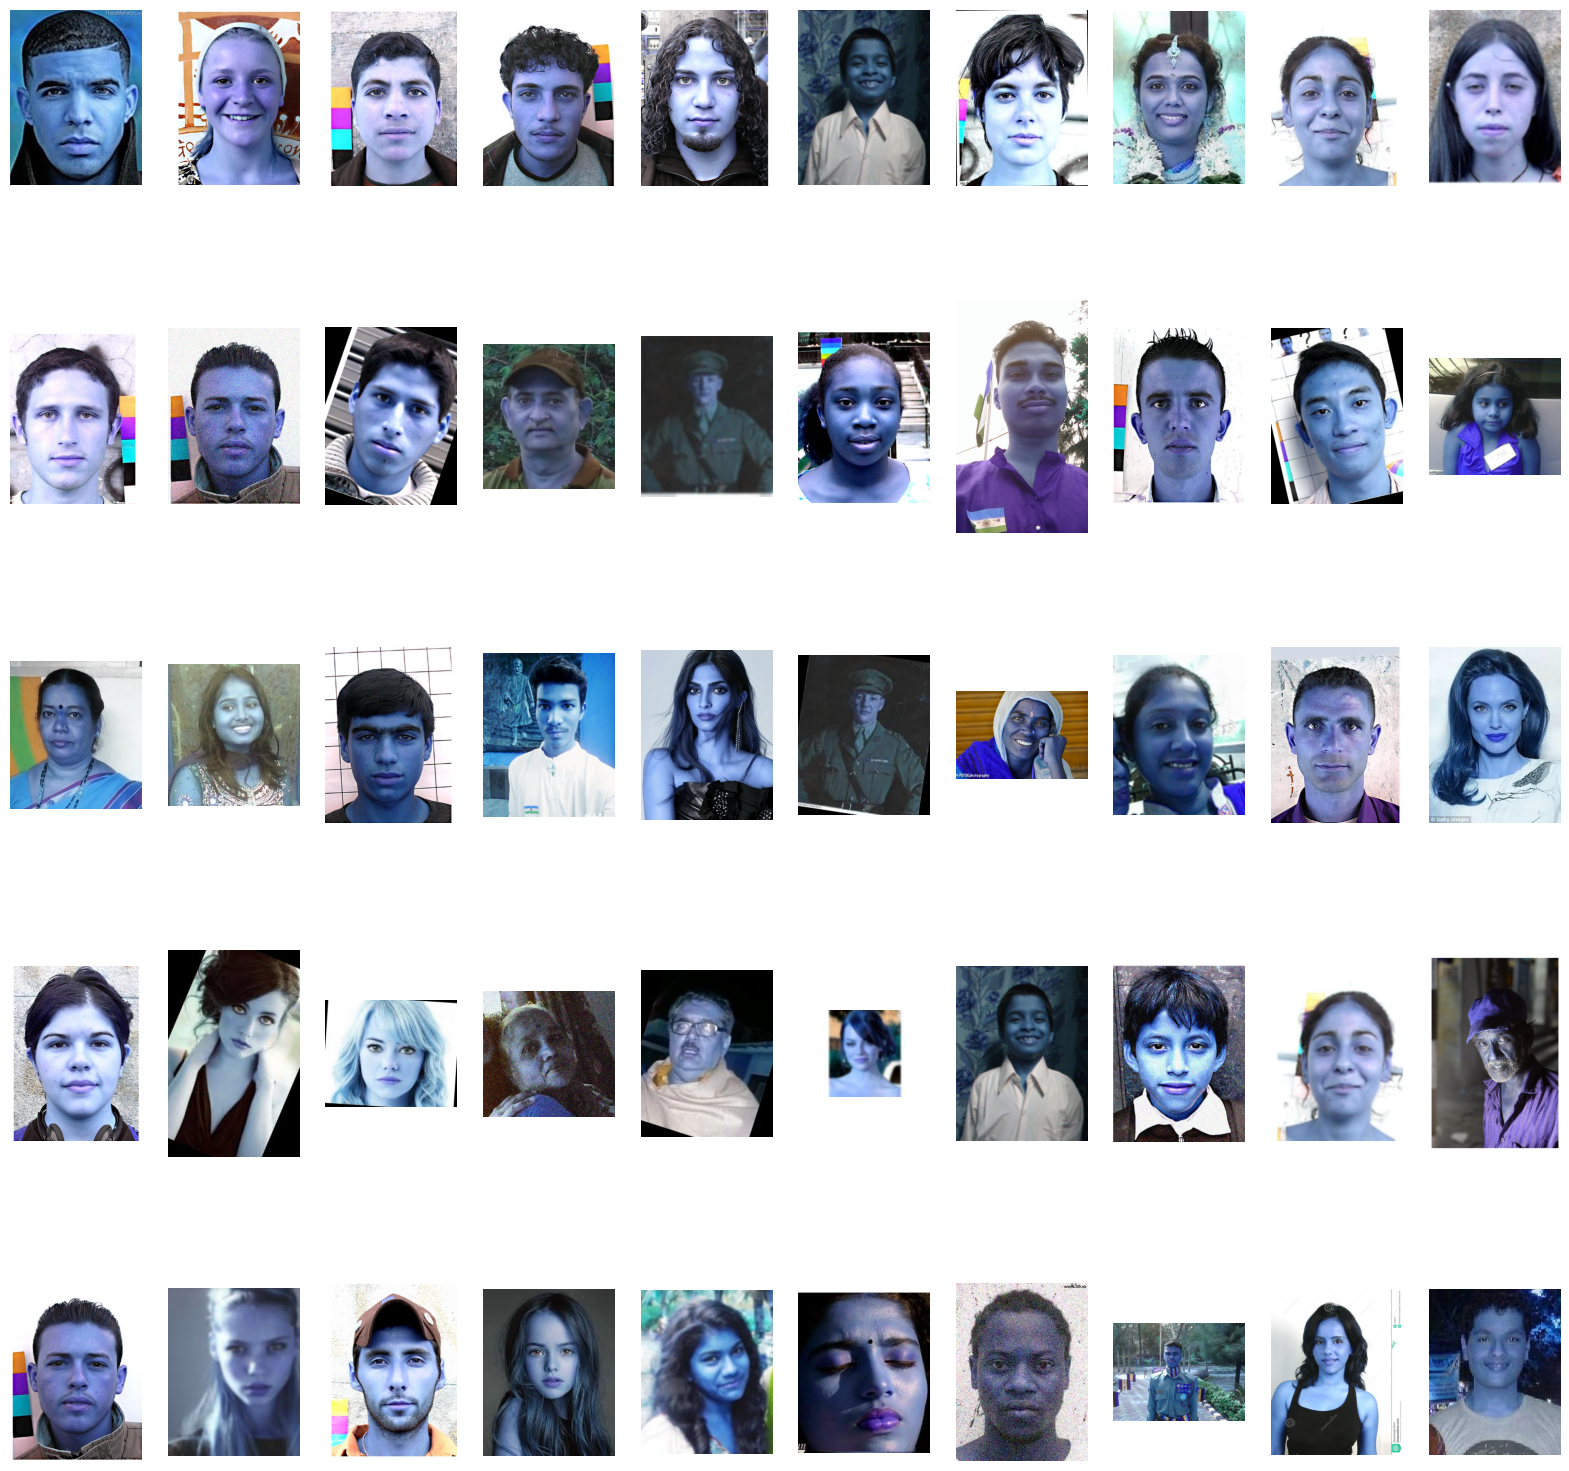

In [ ]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [ ]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [ ]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])

Number
(428, 320, 3)      337
(433, 320, 3)       80
(433, 327, 3)       31
(225, 225, 3)       19
(194, 259, 3)       18
...                ...
(400, 267, 3)        1
(320, 320, 3)        1
(267, 189, 3)        1
(749, 1023, 3)       1
(157, 155, 3)        1

[329 rows x 1 columns]

In [ ]:
size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(size,size))

In [ ]:
data = np.array(data)
label = np.array(label)
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (1117, 128, 128, 3)
X Test Shape is : (198, 128, 128, 3)
Y Train Shape is : (1117,)
Y Test Shape is : (198,)


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(size,size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=15,validation_split = 0.1)

Epoch 1/15
32/32 [==============================] - 18s 513ms/step - loss: 8.8576 - accuracy: 0.6259 - val_loss: 0.2268 - val_accuracy: 0.9018
Epoch 2/15
32/32 [==============================] - 18s 555ms/step - loss: 0.2451 - accuracy: 0.9025 - val_loss: 0.2731 - val_accuracy: 0.9107
Epoch 3/15
32/32 [==============================] - 17s 527ms/step - loss: 0.1560 - accuracy: 0.9483 - val_loss: 0.2291 - val_accuracy: 0.9286
Epoch 4/15
32/32 [==============================] - 18s 576ms/step - loss: 0.1100 - accuracy: 0.9522 - val_loss: 0.2159 - val_accuracy: 0.9375
Epoch 5/15
32/32 [==============================] - 16s 503ms/step - loss: 0.0956 - accuracy: 0.9711 - val_loss: 0.2393 - val_accuracy: 0.9464
Epoch 6/15
32/32 [==============================] - 16s 504ms/step - loss: 0.0732 - accuracy: 0.9721 - val_loss: 0.1857 - val_accuracy: 0.9375
Epoch 7/15
32/32 [==============================] - 16s 491ms/step - loss: 0.0856 - accuracy: 0.9642 - val_loss: 0.2144 - val_accuracy: 0.9464

In [ ]:
hist = pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0   8.857586  0.625871  0.226813      0.901786
1   0.245149  0.902488  0.273150      0.910714
2   0.155971  0.948259  0.229074      0.928571
3   0.109957  0.952239  0.215936      0.937500
4   0.095605  0.971144  0.239326      0.946429
5   0.073181  0.972139  0.185739      0.937500
6   0.085564  0.964179  0.214445      0.946429
7   0.078459  0.974129  0.184314      0.946429
8   0.099348  0.969154  0.248222      0.937500
9   0.072432  0.974129  0.437357      0.910714
10  0.032645  0.991045  0.230939      0.955357
11  0.018446  0.993035  0.324874      0.946429
12  0.019297  0.991045  0.337356      0.937500
13  0.052236  0.985075  0.267683      0.955357
14  0.027083  0.991045  0.306192      0.928571

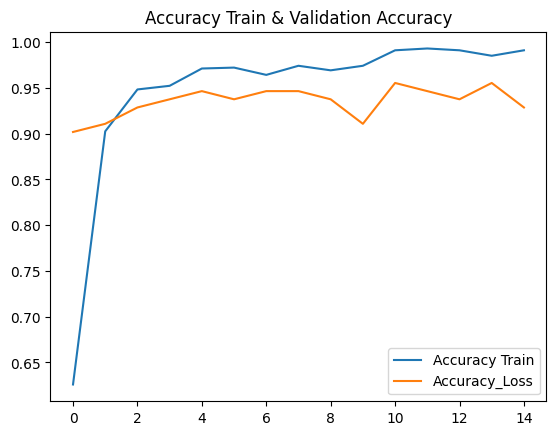

In [ ]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

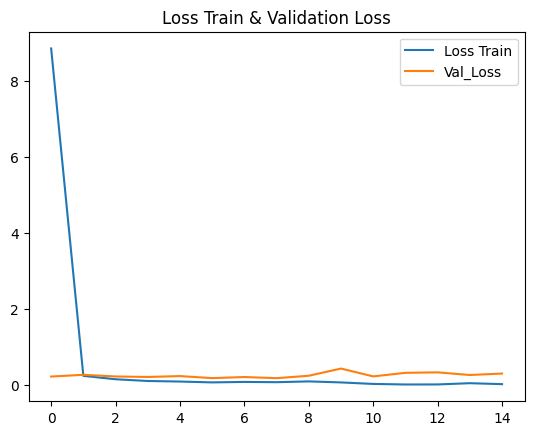

In [ ]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuarcy =', acc)

7/7 [==============================] - 1s 112ms/step - loss: 0.0910 - accuracy: 0.9747
Test Loss = 0.09097927063703537
Test Accuarcy = 0.9747474789619446


In [ ]:
prediction = model.predict(X_test)
prediction

7/7 [==============================] - 3s 424ms/step


array([[6.43947988e-06, 9.99993503e-01],
       [1.98817351e-10, 9.99999940e-01],
       [9.79044318e-01, 2.09556390e-02],
       [8.68962407e-01, 1.31037548e-01],
       [9.99947846e-01, 5.21084112e-05],
       [8.59563670e-11, 9.99999940e-01],
       [9.96970654e-01, 3.02937999e-03],
       [9.85916495e-01, 1.40835829e-02],
       [7.54721654e-08, 9.99999821e-01],
       [1.93199821e-06, 9.99998033e-01],
       [7.17798650e-01, 2.82201290e-01],
       [9.99999940e-01, 5.57270896e-09],
       [1.59604008e-06, 9.99998391e-01],
       [9.42983434e-07, 9.99998987e-01],
       [9.99999940e-01, 1.19680782e-13],
       [6.62110950e-14, 9.99999940e-01],
       [9.95319903e-01, 4.68013855e-03],
       [2.54726351e-09, 9.99999940e-01],
       [9.99866724e-01, 1.33254216e-04],
       [1.03403233e-08, 9.99999940e-01],
       [1.30365711e-25, 9.99999940e-01],
       [9.45228994e-01, 5.47710136e-02],
       [1.54736276e-11, 9.99999940e-01],
       [9.98820007e-01, 1.18001841e-03],
       [9.993380

In [ ]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['prediction'])

prediction
0       with mask
1       with mask
2    without mask
3    without mask
4    without mask
..            ...
193  without mask
194     with mask
195     with mask
196  without mask
197  without mask

[198 rows x 1 columns]

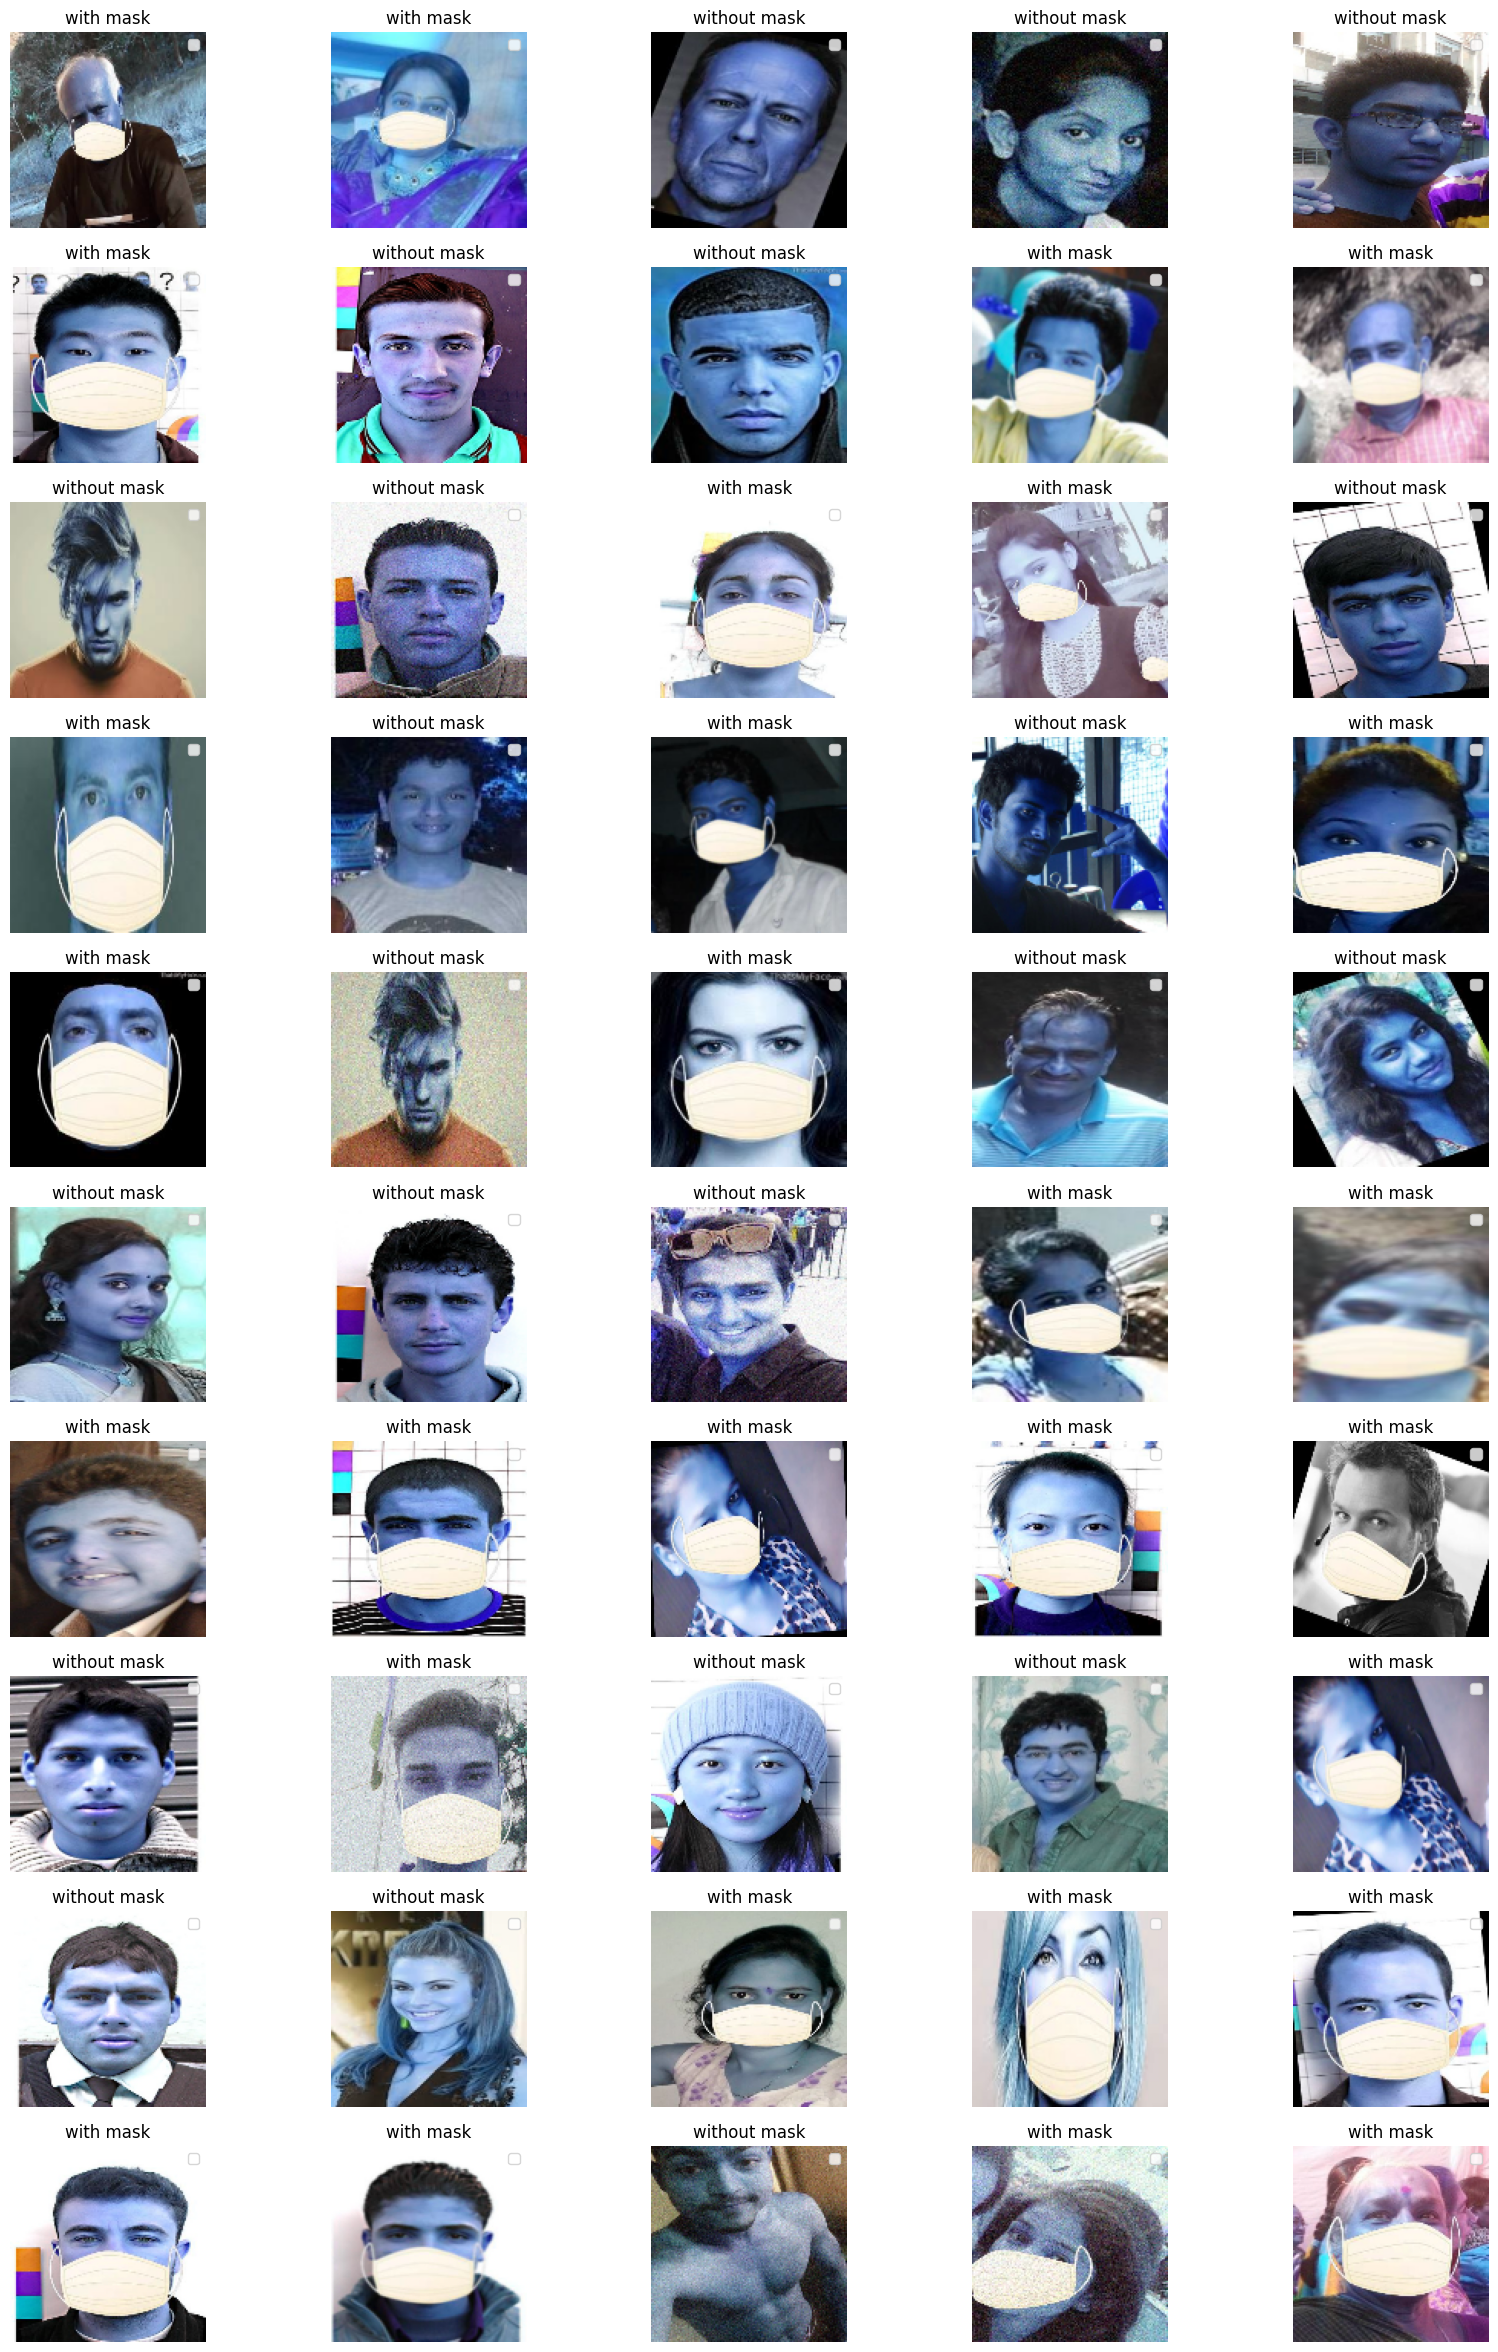

In [ ]:
plt.figure(figsize=(20,30))
i = 1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

array([[103,   5],
       [  0,  90]])

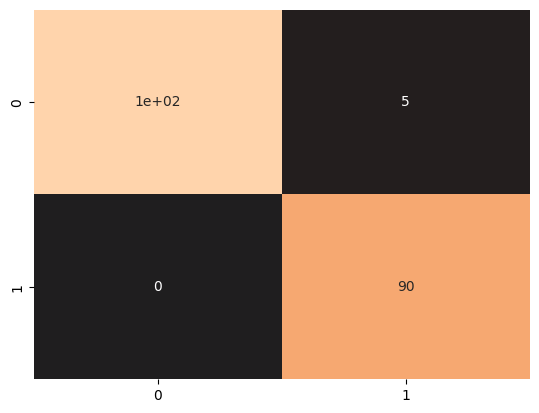

In [ ]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport)

Classification Report is :                precision    recall  f1-score   support

           0       1.00      0.95      0.98       108
           1       0.95      1.00      0.97        90

    accuracy                           0.97       198
   macro avg       0.97      0.98      0.97       198
weighted avg       0.98      0.97      0.97       198

